In [20]:
# Thanks for Code from https://www.kaggle.com/mirzarahim/introduction-to-pca-image-compression-example
# Introduction to PCA: Image Compression example

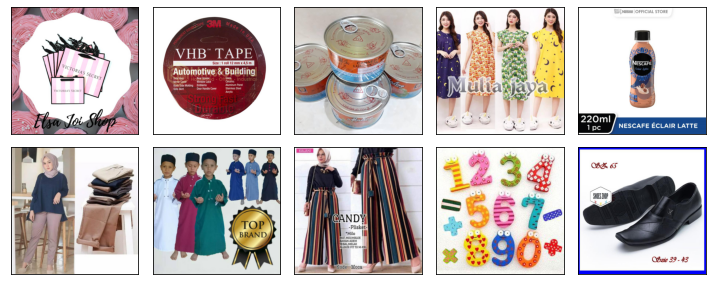

In [21]:
DATA_PATH = '../../../Documents/shopee-product-matching/'

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2, matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from IPython.display import Image
from PIL import Image

train = pd.read_csv(DATA_PATH + 'train.csv')
train['image'] = DATA_PATH + 'train_images/' + train['image']

sample = train.head(10)
image_idx = sample['image']

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        image_file = imread(image_idx[k], cv2.IMREAD_COLOR)
        ax.imshow(image_file, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.tight_layout()
plt.show()


In [22]:
def pca_image(img):
    # Splitting RGB image into R,G,B image
    b = img[:,:,0]/255
    g = img[:,:,1]/255
    r = img[:,:,2]/255
    pca = PCA()
    
    pca.fit(b)

    # Getting cumulative variance
    # by uncomment print part, can monitor the required number of features
    b_var_cumul = np.cumsum(pca.explained_variance_ratio_)*100
    #print('# of features (b) :', b_var_cumul.shape)

    # How many PC(Principal Component)s explain 95% of the variance,
    k_b = np.argmax(b_var_cumul>95)
    #print("# of components explaining 95% variance from image(b): " + str(k_b))

    pca.fit(g)
    g_var_cumul = np.cumsum(pca.explained_variance_ratio_)*100
    #print('# of features (g) :', g_var_cumul.shape)

    # How many PC(Principal Component)s explain 95% of the variance,
    k_g = np.argmax(g_var_cumul>95)
    #print("# of components explaining 95% variance from image(g): " + str(k_g))

    pca.fit(r)
    r_var_cumul = np.cumsum(pca.explained_variance_ratio_)*100
    #print('# of features (r) :', r_var_cumul.shape)

    # How many PC(Principal Component)s explain 95% of the variance,
    k_r = np.argmax(r_var_cumul>95)
    #print("# of components explaining 95% variance from image(r): " + str(k_r))
    
    ipca_b = IncrementalPCA(n_components=k_b)
    ipca_g = IncrementalPCA(n_components=k_g)
    ipca_r = IncrementalPCA(n_components=k_r)
    image_recon_b = ipca_b.inverse_transform(ipca_b.fit_transform(b)) # reconstructed image
    image_recon_g = ipca_g.inverse_transform(ipca_g.fit_transform(g)) # reconstructed image
    image_recon_r = ipca_r.inverse_transform(ipca_r.fit_transform(r)) # reconstructed image

    image_recon = cv2.merge(((image_recon_b), (image_recon_g), (image_recon_r))) # merging b,g,r
    return image_recon

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

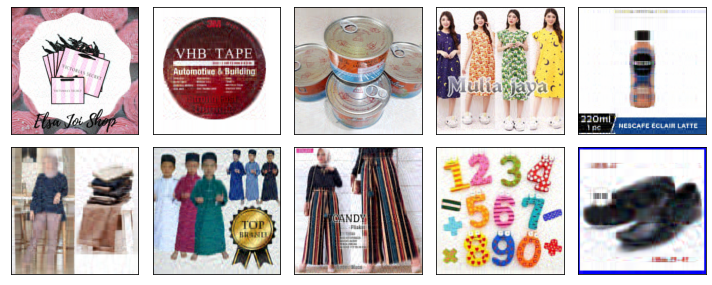

In [23]:
# After PCA

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        image_file = imread(image_idx[k], cv2.IMREAD_COLOR)
        image_recon = pca_image(image_file)
        ax.imshow(image_recon, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.tight_layout()
plt.show()

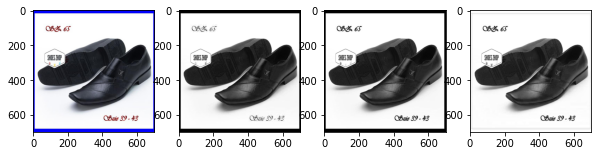

In [26]:
# From here, there are some visualization to figure out what's going on in the Function 'pca_image'

b = image_file[:,:,0]/255
g = image_file[:,:,1]/255
r = image_file[:,:,2]/255

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 4, 1)
ax.imshow(image_file)
ax = fig.add_subplot(1, 4, 2)
ax.imshow(b,cmap=plt.cm.gray)
ax = fig.add_subplot(1, 4, 3)
ax.imshow(g,cmap=plt.cm.gray)
ax = fig.add_subplot(1, 4, 4)
ax.imshow(r,cmap=plt.cm.gray)

plt.show()


In [ ]:
# selecting the number of principal components, explaining more than 95% variance from image
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()
pca.fit(b)

# Getting cumulative variance
b_var_cumul = np.cumsum(pca.explained_variance_ratio_)*100
print('# of features (b) :', b_var_cumul.shape)

# How many PC(Principal Component)s explain 95% of the variance,
k_b = np.argmax(b_var_cumul>95)
print("# of components explaining 95% variance from image(b): " + str(k_b))

pca.fit(g)
g_var_cumul = np.cumsum(pca.explained_variance_ratio_)*100
print('# of features (g) :', g_var_cumul.shape)

# How many PC(Principal Component)s explain 95% of the variance,
k_g = np.argmax(g_var_cumul>95)
print("# of components explaining 95% variance from image(g): " + str(k_g))

pca.fit(r)
r_var_cumul = np.cumsum(pca.explained_variance_ratio_)*100
print('# of features (r) :', r_var_cumul.shape)

# How many PC(Principal Component)s explain 95% of the variance,
k_r = np.argmax(r_var_cumul>95)
print("# of components explaining 95% variance from image(r): " + str(k_r))


In [ ]:
# plotting cumulatively explained variance with the number of components
plt.figure(figsize=[10,5])
plt.title('Cumulatively Explained Variance by the Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('the Number of Principal Components')
plt.axvline(x=k_b, color="b", linestyle="--")
plt.axhline(y=95, color="k", linestyle="--")
plt.axvline(x=k_g, color="g", linestyle="--")
plt.axhline(y=95, color="k", linestyle="--")
plt.axvline(x=k_r, color="r", linestyle="--")
plt.axhline(y=95, color="k", linestyle="--")
ax = plt.plot(b_var_cumul, color='b')
ax = plt.plot(g_var_cumul, color='g')
ax = plt.plot(r_var_cumul, color='r')



In [ ]:
# merging part
ipca_b = IncrementalPCA(n_components=k_b)
ipca_g = IncrementalPCA(n_components=k_g)
ipca_r = IncrementalPCA(n_components=k_r)
image_recon_b = ipca_b.inverse_transform(ipca_b.fit_transform(b)) # reconstructed image
image_recon_g = ipca_g.inverse_transform(ipca_g.fit_transform(g)) # reconstructed image
image_recon_r = ipca_r.inverse_transform(ipca_r.fit_transform(r)) # reconstructed image

image_recon = cv2.merge(((image_recon_b), (image_recon_g), (image_recon_r))) # merging b,g,r

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image_recon_b, cmap=plt.cm.gray)
ax = fig.add_subplot(1, 3, 2)
ax.imshow(image_recon_g, cmap=plt.cm.gray)
ax = fig.add_subplot(1, 3, 3)
ax.imshow(image_recon_r, cmap=plt.cm.gray)

plt.show()
# Plotting reconstructed image
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(image_file, cmap=plt.cm.bone)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(image_recon, cmap=plt.cm.bone)

plt.show()
